**A certain organization wanted an early estimate of their employee churn out rate. So, the HR department came up with data regarding the employee’s salary hike and churn out rate for a financial year. The analytics team will have to perform a deep analysis and predict an estimate of employee churn and present the statistics. Approach –A Simple Linear regression model needs to be built with target variable ‘Churn_out_rate’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.**

Business objective: To find the churn out rate for a financial year.

Constraints: Predict an estimate of employee churn and present the statistics.

DATA: There are two columns Salary hike and churn out rate.The data used for this analysis contains information on 10 records of salary hike and churn out rate.

At first,we need to understand the data and hence we load the same and the libraries required.

In [ ]:

# Importing necessary libraries
import pandas as pd # deals with data frame                     # for Data Manipulation\n",
import numpy as np  # deals with numerical values              # for Mathematical calculations\n",

wcat = pd.read_csv("D:/7 data mining/supervised/linear regresstion/assignment/emp_data.csv")

wcat.describe()
####Out[4]: 
                SH         CR
count    10.000000  10.000000
mean   1688.600000  72.900000
std      92.096809  10.257247
min    1580.000000  60.000000
25%    1617.500000  65.750000
50%    1675.000000  71.000000
75%    1724.000000  78.750000
max    1870.000000  92.000000

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

plt.bar(height = wcat.CR, x = np.arange(1, 11, 1))
plt.hist(wcat.CR) #histogram
plt.boxplot(wcat.CR) #boxplot

plt.bar(height = wcat.SH, x = np.arange(1, 11, 1))
plt.hist(wcat.SH) #histogram
plt.boxplot(wcat.SH) #boxplot

# Scatter plot
plt.scatter(x = wcat['SH'], y = wcat['CR'], color = 'green') 

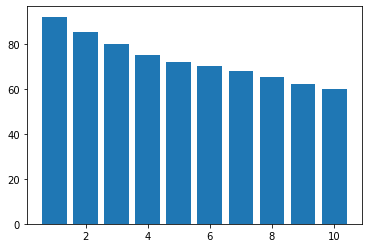

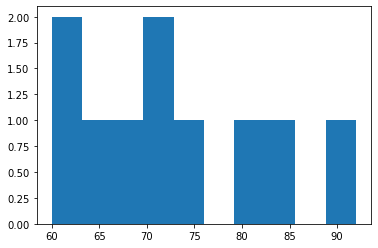

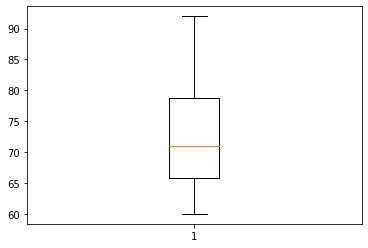

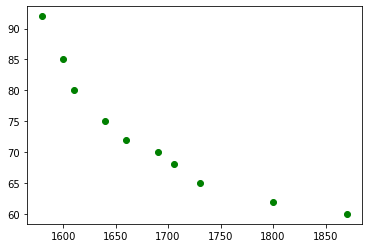

# Covariance

# NumPy does not have a function to calculate the covariance between two variables directly. 

# Function for calculating a covariance matrix called cov() 

# By default, the cov() function will calculate the unbiased or sample covariance between the provided random variables.

In [ ]:
np.corrcoef(wcat.SH, wcat.CR) 
Out[15]: 
array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

cov_output = np.cov(wcat.SH, wcat.CR)[0, 1]

cov_output
Out[21]: -861.2666666666665

# wcat.cov()

# Import library

import statsmodels.formula.api as smf

# Simple Linear Regression

model = smf.ols('CR ~ SH', data = wcat).fit()

model.summary()
C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
Out[27]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CR   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000239
Time:                        18:23:28   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
SH            -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

pred1 = model.predict(pd.DataFrame(wcat['SH']))

# Regression Line

plt.scatter(wcat.SH, wcat.CR)
Out[30]: <matplotlib.collections.PathCollection at 0x2b657991bb0>

plt.plot(wcat.SH, pred1, "r")
Out[31]: [<matplotlib.lines.Line2D at 0x2b6579edb20>]

plt.legend(['Predicted line', 'Observed data'])
Out[32]: <matplotlib.legend.Legend at 0x2b657a4b580>

plt.show()

# Error calculation

res1 = wcat.CR - pred1

res_sqr1 = res1 * res1

mse1 = np.mean(res_sqr1)

rmse1 = np.sqrt(mse1)

rmse1
Out[39]: 3.997528462337794

######### Model building on Transformed Data

# Log Transformation

# x = log(waist); y = at

plt.scatter(x = np.log(wcat['SH']), y = wcat['CR'], color = 'brown')
Out[43]: <matplotlib.collections.PathCollection at 0x2b657af34f0>

np.corrcoef(np.log(wcat.SH), wcat.CR) #correlation
Out[44]: 
array([[ 1.        , -0.92120773],
       [-0.92120773,  1.        ]])

model2 = smf.ols('CR ~ np.log(SH)', data = wcat).fit()

model2.summary()
C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
Out[46]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CR   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           0.000153
Time:                        18:23:48   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(SH)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

pred2 = model2.predict(pd.DataFrame(wcat['SH']))

# Regression Line

plt.scatter(np.log(wcat.SH), wcat.CR)
Out[49]: <matplotlib.collections.PathCollection at 0x2b657b5ddf0>

plt.plot(np.log(wcat.SH), pred2, "r")
Out[50]: [<matplotlib.lines.Line2D at 0x2b657bc7190>]

plt.legend(['Predicted line', 'Observed data'])
Out[51]: <matplotlib.legend.Legend at 0x2b658bd18e0>

plt.show()

# Error calculation

res2 = wcat.CR - pred2

res_sqr2 = res2 * res2

mse2 = np.mean(res_sqr2)

rmse2 = np.sqrt(mse2)

rmse2
Out[58]: 3.7860036130228094

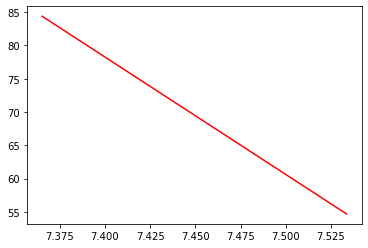

In [ ]:
#### Exponential transformation

# x = waist; y = log(at)

plt.scatter(x = wcat['SH'], y = np.log(wcat['CR']), color = 'orange')
Out[61]: <matplotlib.collections.PathCollection at 0x2b658c43e80>

np.corrcoef(wcat.SH, np.log(wcat.CR)) #correlation
Out[62]: 
array([[ 1.        , -0.93463607],
       [-0.93463607,  1.        ]])

model3 = smf.ols('np.log(CR) ~ SH', data = wcat).fit()

model3.summary()
C:\Users\HP\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
Out[64]: 
<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(CR)   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     55.26
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           7.38e-05
Time:                        18:25:53   Log-Likelihood:                 16.511
No. Observations:                  10   AIC:                            -29.02
Df Residuals:                       8   BIC:                            -28.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6383      0.318     20.902      0.000       5.906       7.371
SH            -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

pred3 = model3.predict(pd.DataFrame(wcat['SH']))

pred3_at = np.exp(pred3)

pred3_at
Out[67]: 
0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

# Regression Line

plt.scatter(wcat.SH, np.log(wcat.CR))
Out[69]: <matplotlib.collections.PathCollection at 0x2b657a4b850>

plt.plot(wcat.SH, pred3, "r")
Out[70]: [<matplotlib.lines.Line2D at 0x2b658cf18e0>]

plt.legend(['Predicted line', 'Observed data'])
Out[71]: <matplotlib.legend.Legend at 0x2b658d3ce20>

plt.show()

# Error calculation

res3 = wcat.CR - pred3_at

res_sqr3 = res3 * res3

mse3 = np.mean(res_sqr3)

rmse3 = np.sqrt(mse3)

rmse3
Out[78]: 3.5415493188215934

model4 = smf.ols('np.log(CR) ~ SH + I(DT*DT)', data = wcat).fit()
model4.summary()

pred4 = model4.predict(pd.DataFrame(wcat))
pred4_at = np.exp(pred4)
pred4_at

# Regression line
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X = wcat.iloc[:, 0:1].values
X_poly = poly_reg.fit_transform(X)
# y = wcat.iloc[:, 1].values


plt.scatter(wcat.SH, np.log(wcat.CR))
plt.plot(X, pred4, color = 'red')
plt.legend(['Predicted line', 'Observed data'])
plt.show()


# Error calculation
res4 = wcat.CR - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4


# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)
table_rmse

###################
# The best model

from sklearn.model_selection import train_test_split

train, test = train_test_split(wcat, test_size = 0.2)

finalmodel = smf.ols('np.log(CR) ~ SH + I(SH*SH)', data = train).fit()
finalmodel.summary()

# Predict on test data
test_pred = finalmodel.predict(pd.DataFrame(test))
pred_test_CR = np.exp(test_pred)
pred_test_CR

# Model Evaluation on Test data
test_res = test.CR - pred_test_CR
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
test_rmse


# Prediction on train data
train_pred = finalmodel.predict(pd.DataFrame(train))
pred_train_CR = np.exp(train_pred)
pred_train_CR

# Model Evaluation on train data
train_res = train.CR- pred_train_CR
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
train_rmse



RESULT: As we have recorded the RMSE values, Correlation coefficient values for different transformation models.